<a href="https://colab.research.google.com/github/gkar90/Tensorflow-Grad-Admissions-Modeling/blob/main/Neural_Network_for_Grad_Admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloaded this dataset from Kaggle that is providing the chance of admission to graduate schools based off factors like GRE, undergrad school rating, etc...

I'm going to attempt to create a neural network that should be able to predict the chance of admission based off multiple factors, which we will look into more below

To start: lets import all necessary functions for this project:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer


Now let's take a look at the data

In [16]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [17]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Main points to see here:


1.   All data is numerical, so no need to change anything from text->numerical
2.   The Serial Number column is not something we need. It seems its just an ID system, so we can drop this.
3.    All the data is on different scales, so we're going to need to normalize our data to get a proper model.



In [18]:
data = data.drop(["Serial No."], axis = 1)
features = data.iloc[ : , : -1]
labels = data.iloc[ : , -1]

In [19]:
features.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [20]:
labels.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

So we have out inputs (features table) and our output (labels table).

Now can break down our features table into training and test sets to work for our model

In [21]:
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size = 0.2, random_state = 10)

We have our train and test tables now, but we need to pre-process this data so that the model can work properly. So here we will normalize the data, and then will start workign on the modeling.

In [22]:
numerical_features = features.select_dtypes(include = ['float64', 'int64'])
numerical_columns = numerical_features.columns

ct = ColumnTransformer(
    [('only numeric', 
      StandardScaler(), 
      numerical_columns)], 
      remainder = "passthrough")

features_train_scaled = ct.fit_transform(features_train)

features_test_scaled = ct.transform(features_test)

features_train_normalized = pd.DataFrame(
    features_train_scaled, columns = features_train.columns
)


In [23]:
features_train_normalized.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.416963,0.307660,-0.059710,0.167470,0.069958,0.385758,0.872992
1,1.897564,1.625617,0.824884,0.167470,1.146239,1.454160,0.872992
2,0.155681,-0.021829,-0.059710,-0.336199,0.069958,-0.472201,0.872992
3,-0.366884,-0.021829,0.824884,1.174807,0.608098,0.142939,0.872992
4,1.287905,1.296128,1.709478,0.671138,0.069958,1.421785,0.872992


Awesome. Our Data has been scaled/normalized and now we can actually start modeling and creating a neural network

In [24]:
def neural_model(features, learning_rate):

  #instantiate the model
  my_model = Sequential()

  #create our input layer
  my_input = InputLayer(input_shape = (features.shape[1], ))

  #adds the input layer to the model
  my_model.add(my_input) 

  #add a hidden layer with 64 neurons
  my_model.add(Dense(64, activation = 'relu'))

  #add our output
  my_model.add(Dense(1))

  #consider our optimizer, loss-rate, and metrics:
  opt = Adam(learning_rate)

  my_model.compile(loss = 'mse', metrics = ['mae'], optimizer = opt)

  return my_model

my_model = neural_model(features, 0.01)



In [25]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


Before fitting the model, need to consider things like the optimizer, loss-rate, and metric, so let's compile that into our model now before fitting:

In [26]:
my_model.fit(features_train_scaled, 
             labels_train, 
             epochs = 40, 
             batch_size = 1, 
             verbose = 1)

Epoch 1/40
400/400 [==============================] - 1s 1ms/step - loss: 0.1101 - mae: 0.2316
Epoch 2/40
400/400 [==============================] - 0s 1ms/step - loss: 0.0100 - mae: 0.0802
Epoch 3/40
400/400 [==============================] - 1s 1ms/step - loss: 0.0082 - mae: 0.0695
Epoch 4/40
400/400 [==============================] - 0s 1ms/step - loss: 0.0065 - mae: 0.0632
Epoch 5/40
400/400 [==============================] - 0s 1ms/step - loss: 0.0055 - mae: 0.0581
Epoch 6/40
400/400 [==============================] - 0s 1ms/step - loss: 0.0048 - mae: 0.0533
Epoch 7/40
400/400 [==============================] - 0s 1ms/step - loss: 0.0062 - mae: 0.0613
Epoch 8/40
400/400 [==============================] - 0s 1ms/step - loss: 0.0066 - mae: 0.0597
Epoch 9/40
400/400 [==============================] - 0s 1ms/step - loss: 0.0047 - mae: 0.0512
Epoch 10/40
400/400 [==============================] - 0s 1ms/step - loss: 0.0053 - mae: 0.0553
Epoch 11/40
400/400 [============================

Had some big fluctuations around epoch 5-10...so lets play around with the hyperparameters to see if we can optimize the parameters to minimize our loss.

Epoch 00026: early stopping


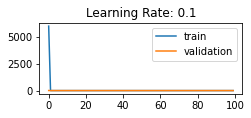

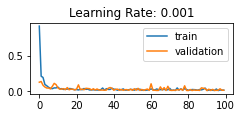

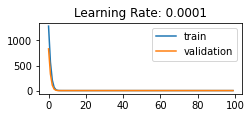

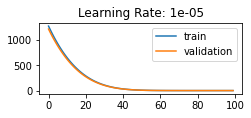

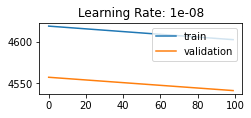

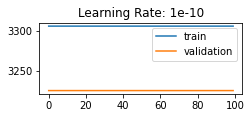

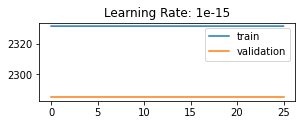

See the plot above with learning rates [0.1, 0.001, 0.0001, 1e-05, 1e-08, 1e-10, 1e-15]


In [33]:
def fit_model(feat_train, lab_train, learning_rate, num_epochs, b_size):
  model = neural_model(feat_train, learning_rate)

  #add early stopping for overfitting purposes
  stop = EarlyStopping(monitor = "val_loss", mode = 'min', verbose = 1, patience = 25)

  # now train the model:
  history = model.fit(feat_train, lab_train, epochs = num_epochs, 
                      batch_size = b_size, verbose = 0, validation_split = 0.2, callbacks=[stop])
  
  #now plot the learning curves
  plt.plot(history.history['loss'], label = 'train')
  plt.plot(history.history['val_loss'], label = 'validation')
  plt.title("Learning Rate: " + str(learning_rate))
  plt.legend(loc = 'upper right')

  return history
  
#make a list of learning rates to try out
learning_rates = [1E-1, 1E-3, 1E-4, 1E-5, 1E-8, 1E-10, 1E-15]

#fixed number of epochs
num_epochs = 100

#fixed number of batches
batch_size = 10 

for i in range(len(learning_rates)):
  plt.figure(figsize=(8,6))
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  fit_model(features_train, labels_train, learning_rates[i], num_epochs, batch_size)

plt.tight_layout()
plt.show()
print("See the plot above with learning rates", learning_rates)


It looks like the best learning rate is 1E-5 based off the charts above, so lets fit the model now based off our optimal learning rate:

In [39]:
stop = EarlyStopping(monitor = "val_loss", mode = 'min', verbose = 1, patience = 25)
learning_rate = 1E-05
my_model.fit(features_train_scaled, 
              labels_train, 
              epochs = 100, 
              batch_size = 10, 
              verbose = 1, 
              validation_split= 0.2, 
              callbacks=[stop])

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0035 - mae: 0.0419 - val_loss: 0.0041 - val_mae: 0.0502
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0034 - mae: 0.0408 - val_loss: 0.0043 - val_mae: 0.0526
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0035 - mae: 0.0425 - val_loss: 0.0041 - val_mae: 0.0516
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0036 - mae: 0.0427 - val_loss: 0.0040 - val_mae: 0.0488
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0035 - mae: 0.0419 - val_loss: 0.0041 - val_mae: 0.0493
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0037 - mae: 0.0435 - val_loss: 0.0040 - val_mae: 0.0487
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0035 - mae: 0.0423 - val_loss: 0.0040 - val_mae: 0.0499
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0036 - m

Cool, so we've stopped around epoch 59, so we can now use that as our next optimized hyperparameter.

See the plot on the bottom with batch sizes [4, 32, 64]


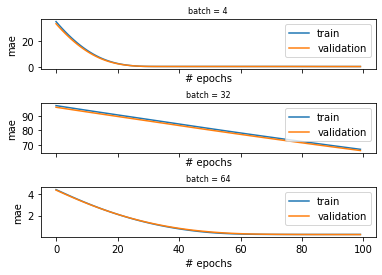

In [53]:
def fit_model2(feat_train, lab_train, learning_rate, num_epochs, b_size, ax):
    model = neural_model(features_train, learning_rate)
    #train the model on the training data
    history = model.fit(features_train, labels_train, epochs=num_epochs, batch_size = b_size, verbose=0, validation_split = 0.2, callbacks=[stop])
    # plot learning curves
    ax.plot(history.history['mae'], label='train')
    ax.plot(history.history['val_mae'], label='validation')
    ax.set_title('batch = ' + str(b_size), fontdict={'fontsize': 8, 'fontweight': 'medium'})
    ax.set_xlabel('# epochs')
    ax.set_ylabel('mae')
    ax.legend()
    return history


batches = [4, 32, 64] 
#plotting code
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.7, 'wspace': 0.4}) #preparing axes for plotting
axes = [ax1, ax2, ax3]
for i in range(len(batches)):
  fit_model2(features_train, labels_train, learning_rate, num_epochs, batches[i], axes[i])

print("See the plot on the bottom with batch sizes", batches)

Sweet, so looks like epoch 60 was right for our optimal guess. Lets now use batch 64 (personal preference) and continue finishing fitting our model:

In [59]:
stop = EarlyStopping(monitor = "val_loss", mode = 'min', verbose = 1, patience = 25)
learning_rate = 1E-05
history = my_model.fit(features_train_scaled, 
              labels_train, 
              epochs = 60, 
              batch_size = 64, 
              verbose = 1, 
              validation_split= 0.2, 
              callbacks=[stop])

Epoch 1/60
5/5 [==============================] - 0s 28ms/step - loss: 0.0034 - mae: 0.0405 - val_loss: 0.0040 - val_mae: 0.0486
Epoch 2/60
5/5 [==============================] - 0s 13ms/step - loss: 0.0033 - mae: 0.0402 - val_loss: 0.0040 - val_mae: 0.0490
Epoch 3/60
5/5 [==============================] - 0s 15ms/step - loss: 0.0033 - mae: 0.0409 - val_loss: 0.0040 - val_mae: 0.0490
Epoch 4/60
5/5 [==============================] - 0s 13ms/step - loss: 0.0034 - mae: 0.0410 - val_loss: 0.0039 - val_mae: 0.0490
Epoch 5/60
5/5 [==============================] - 0s 14ms/step - loss: 0.0034 - mae: 0.0405 - val_loss: 0.0040 - val_mae: 0.0485
Epoch 6/60
5/5 [==============================] - 0s 14ms/step - loss: 0.0034 - mae: 0.0403 - val_loss: 0.0040 - val_mae: 0.0487
Epoch 7/60
5/5 [==============================] - 0s 13ms/step - loss: 0.0034 - mae: 0.0410 - val_loss: 0.0040 - val_mae: 0.0493
Epoch 8/60
5/5 [==============================] - 0s 14ms/step - loss: 0.0034 - mae: 0.0411 - val

Awesome, now lets take a look at our MSE (mean squared error) and MAE (mean absolute error)

In [58]:
val_mse, val_mae = my_model.evaluate(
  features_test, 
  labels_test, 
  verbose = 0
)

print("MAE: ", val_mae)
print("MSE: ", val_mse)

MAE:  7.310849666595459
MSE:  53.5026969909668


Lastly, lets see if we can plot the model loss per epoch, and the mean average loss per epoch for the training and the validation data. 

This will help us vizualize the summary statistics regarding our validation and training sets.

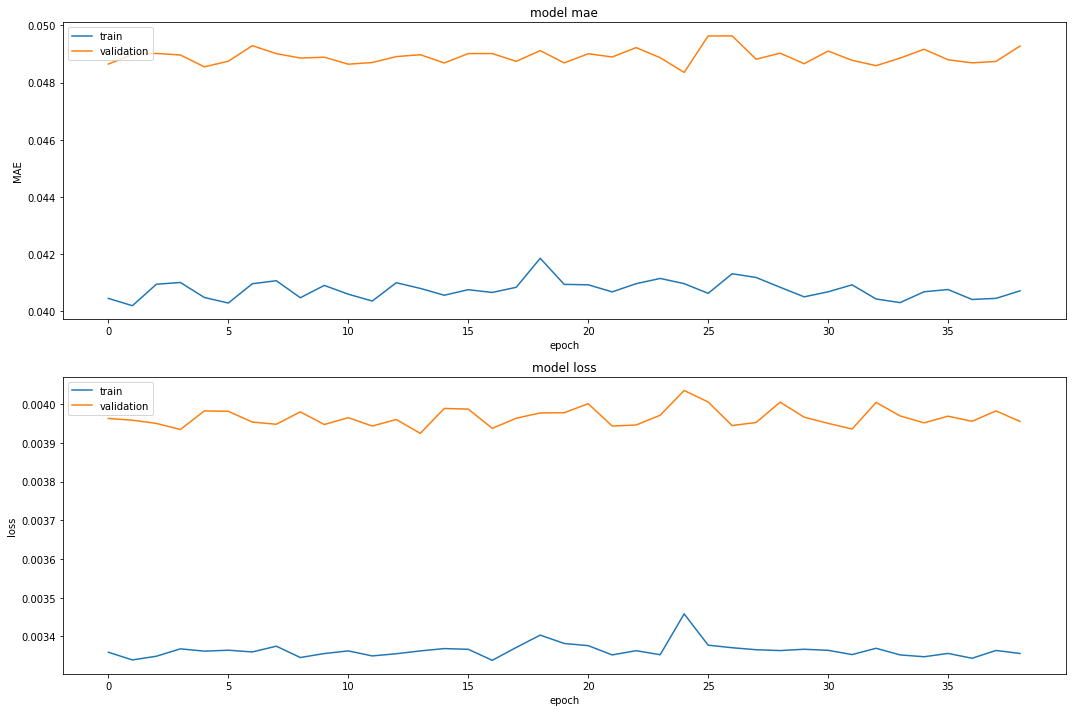

In [60]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
 
  # Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
 
# used to keep plots from overlapping each other  
fig.tight_layout()